In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.12.0


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 476s 563ms/step - loss: 0.2189 - acc: 0.9335 - val_loss: 0.0419 - val_acc: 0.9882
Epoch 2/5
844/844 [==============================] - 458s 542ms/step - loss: 0.0755 - acc: 0.9787 - val_loss: 0.0310 - val_acc: 0.9910
Epoch 3/5
844/844 [==============================] - 467s 553ms/step - loss: 0.0590 - acc: 0.9835 - val_loss: 0.0264 - val_acc: 0.9927
Epoch 4/5
844/844 [==============================] - 460s 545ms/step - loss: 0.0487 - acc: 0.9859 - val_loss: 0.0277 - val_acc: 0.9928
Epoch 5/5
844/844 [==============================] - 461s 546ms/step - loss: 0.0448 - acc: 0.9869 - val_loss: 0.0307 - val_acc: 0.9918


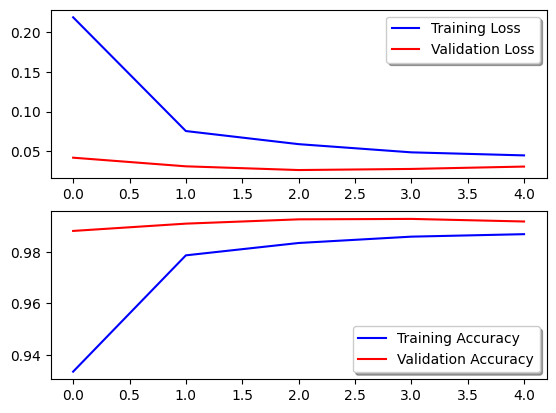

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 19s 61ms/step - loss: 0.0268 - acc: 0.9917


In [ ]:
x = model.predict(x_test[0].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 115ms/step


In [ ]:
np.argmax(x)

7

In [ ]:
print(np.argmax(y_test[0]))

7


In [ ]:
ab = np.array([0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.570313, 0.5625, 0.632813, 0.625, 0.5625, 0.5625, 0.5625, 0.617188, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.570313, 0.632813, 0.632813, 0.5625, 0.5625, 0.554688, 0.617188, 0, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.570313, 0.5625, 0.570313, 0.570313, 0.5625, 0.5625, 0.554688, 0, 0.5625, 0.5625, 0.5625, 0.570313, 0.570313, 0.570313, 0.570313, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0, 0.5625, 0.570313, 0.632813, 0.640625, 0.640625, 0.640625, 0.648438, 0.640625, 0.640625, 0.640625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0.5625, 0.632813, 0.648438, 0.65625, 0.648438, 0.65625, 0.648438, 0.648438, 0.648438, 0.648438, 0.640625, 0.632813, 0.625, 0.5625, 0.554688, 0.554688, 0.546875, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0.5625, 0.632813, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.648438, 0.65625, 0.648438, 0.648438, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.625, 0.570313, 0, 0.554688, 0.5625, 0.632813, 0.5625, 0.570313, 0.5625, 0.5625, 0.5625, 0.632813, 0.648438, 0.726563, 0.65625, 0.640625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.578125, 0.648438, 0.726563, 0.65625, 0.640625, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.640625, 0.65625, 0.71875, 0.648438, 0.632813, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.554688, 0.570313, 0.640625, 0.65625, 0.65625, 0.632813, 0.5625, 0.554688, 0.546875, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0, 0.554688, 0.554688, 0.5625, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.648438, 0.648438, 0.640625, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.554688, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.640625, 0.648438, 0.640625, 0.570313, 0.5625, 0.554688, 0.554688, 0.546875, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.570313, 0.640625, 0.648438, 0.632813, 0.5625, 0.5625, 0.554688, 0.546875, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.570313, 0.640625, 0.640625, 0.632813, 0.570313, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.570313, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.570313, 0.640625, 0.648438, 0.648438, 0.632813, 0.5625, 0.5625, 0.5625, 0.5625, 0.625, 0.632813, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.632813, 0.5625, 0.570313, 0.5625, 0.570313, 0.5625, 0.5625, 0, 0.554688, 0.5625, 0.570313, 0.640625, 0.648438, 0.65625, 0.648438, 0.640625, 0.648438, 0.648438, 0.640625, 0.648438, 0.648438, 0.65625, 0.664063, 0.664063, 0.664063, 0.664063, 0.664063, 0.648438, 0.640625, 0.5625, 0.5625, 0.5625, 0.5625, 0.570313, 0.5625, 0, 0.570313, 0.578125, 0.640625, 0.648438, 0.648438, 0.65625, 0.65625, 0.65625, 0.65625, 0.648438, 0.648438, 0.65625, 0.65625, 0.726563, 0.726563, 0.726563, 0.726563, 0.726563, 0.71875, 0.648438, 0.640625, 0.5625, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0, 0.632813, 0.640625, 0.648438, 0.640625, 0.640625, 0.648438, 0.648438, 0.648438, 0.648438, 0.648438, 0.648438, 0.65625, 0.65625, 0.726563, 0.65625, 0.65625, 0.65625, 0.648438, 0.648438, 0.65625, 0.632813, 0.5625, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0, 0.570313, 0.5625, 0.578125, 0.632813, 0.632813, 0.640625, 0.640625, 0.640625, 0.632813, 0.640625, 0.648438, 0.648438, 0.65625, 0.65625, 0.640625, 0.648438, 0.648438, 0.648438, 0.640625, 0.632813, 0.632813, 0.5625, 0.5625, 0.554688, 0.554688, 0.5625, 0.5625, 0, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.570313, 0.570313, 0.640625, 0.640625, 0.632813, 0.632813, 0.625, 0.570313, 0.5625, 0.5625, 0.570313, 0.5625, 0.554688, 0.554688, 0.554688, 0.5625, 0.554688, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.554688, 0.5625, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.570313, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.570313, 0.5625, 0.570313, 0.5625, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.5625, 0.570313, 0.570313, 0.570313, 0.570313, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.5625, 0.554688, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.570313, 0.570313, 0.5625, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.632813, 0.632813, 0.632813, 0.632813, 0.5625, 0, 0.554688, 0.554688, 0.5625, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.625, 0.625, 0.632813, 0.632813, 0.632813, 0.632813, 0.632813, 0.632813])

In [ ]:
a = np.array([0.6875, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.75, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.75, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.75, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.75, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.757813, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.757813, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.757813, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.75, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.757813, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.757813, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.757813, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.75, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.75, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.75, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.757813, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375, 0.757813, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.835938, 0.757813, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.75, 0.835938, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.757813, 0.835938, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.84375, 0.835938, 0.75, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.835938, 0.835938, 0.835938, 0.84375, 0.84375, 0.835938, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.84375, 0.835938, 0.84375, 0.835938, 0.84375])
b = np.array([0, 0, 0.5, 0.5, 0.5, 0.5, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0, 0, 0, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0, 0, 0.554688, 0.5625, 0.578125, 0.648438, 0.65625, 0.664063, 0.664063, 0.664063, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.5625, 0.5625, 0.5625, 0.5625, 0.5625, 0.554688, 0, 0, 0.5625, 0.578125, 0.664063, 0.679688, 0.742188, 0.65625, 0.648438, 0.65625, 0.664063, 0.742188, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0, 0, 0, 0.570313, 0.65625, 0.742188, 0.679688, 0.664063, 0.578125, 0.5625, 0, 0.5625, 0.578125, 0.671875, 0.65625, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.65625, 0.75, 0.671875, 0.578125, 0.5625, 0, 0, 0, 0, 0.570313, 0.734375, 0.671875, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.65625, 0.664063, 0.570313, 0, 0, 0, 0, 0, 0, 0.570313, 0.671875, 0.671875, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.664063, 0.671875, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.664063, 0.671875, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.664063, 0.671875, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.671875, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.648438, 0.671875, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.65625, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.664063, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.585938, 0.65625, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.65625, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.578125, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.65625, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.65625, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.578125, 0.664063, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.664063, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.585938, 0.671875, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.585938, 0.664063, 0.679688, 0.671875, 0.65625, 0.578125, 0.578125, 0.570313, 0.570313, 0.570313, 0.570313, 0.570313, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.578125, 0.585938, 0.648438, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.664063, 0.664063, 0.65625, 0.570313, 0, 0, 0, 0, 0.570313, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5625, 0.5625, 0.5625, 0.570313, 0.570313, 0.578125, 0.585938, 0.65625, 0.664063, 0.578125, 0, 0, 0, 0, 0.570313, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5625, 0.5625, 0, 0, 0, 0, 0, 0, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
c = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.570313, 0.570313, 0.570313, 0.570313, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.664063, 0.671875, 0.664063, 0.65625, 0.648438, 0.648438, 0.570313, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.578125, 0.65625, 0.648438, 0.578125, 0.5625, 0.5625, 0.5625, 0.570313, 0.648438, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.5625, 0.554688, 0, 0, 0, 0, 0.5625, 0.578125, 0.65625, 0.554688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.585938, 0.671875, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.664063, 0.664063, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.65625, 0.671875, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.585938, 0.671875, 0.585938, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.570313, 0.585938, 0.664063, 0.664063, 0.578125, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.65625, 0.671875, 0.664063, 0.65625, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.65625, 0.679688, 0.679688, 0.65625, 0.578125, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.578125, 0.65625, 0.671875, 0.671875, 0.65625, 0.585938, 0.585938, 0.570313, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.578125, 0.585938, 0.648438, 0.648438, 0.65625, 0.65625, 0.664063, 0.664063, 0.570313, 0.554688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.578125, 0.65625, 0.664063, 0.585938, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.648438, 0.65625, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.648438, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.585938, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.578125, 0.664063, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.65625, 0.679688, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.671875, 0.671875, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.578125, 0.742188, 0.65625, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.671875, 0.679688, 0.570313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.570313, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.570313, 0.65625, 0.742188, 0.65625, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.585938, 0.664063, 0.65625, 0.664063, 0.65625, 0.664063, 0.664063, 0.671875, 0.742188, 0.75, 0.578125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.570313, 0.65625, 0.664063, 0.679688, 0.742188, 0.75, 0.75, 0.75, 0.679688, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.570313, 0.585938, 0.664063, 0.679688, 0.679688, 0.679688, 0.585938, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.578125, 0.585938, 0.585938, 0.570313, 0, 0, 0, 0, 0, 0])
d = np.array([0, 0, 0, 0, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.539063, 0.546875, 0.546875, 0.554688, 0.546875, 0.554688, 0.546875, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0, 0.53125, 0.539063, 0.546875, 0.546875, 0.546875, 0.546875, 0.554688, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.5625, 0.5625, 0.554688, 0.554688, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.539063, 0.539063, 0.539063, 0, 0, 0, 0.539063, 0.539063, 0.546875, 0.546875, 0.554688, 0.5625, 0.632813, 0.632813, 0.632813, 0.640625, 0.640625, 0.640625, 0.640625, 0.632813, 0.5625, 0.554688, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0, 0, 0, 0.539063, 0.539063, 0.546875, 0.554688, 0.632813, 0.640625, 0.648438, 0.640625, 0.640625, 0.640625, 0.648438, 0.71875, 0.726563, 0.726563, 0.640625, 0.5625, 0.554688, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0, 0, 0, 0, 0.539063, 0.546875, 0.5625, 0.65625, 0.71875, 0.648438, 0.632813, 0.554688, 0.554688, 0.554688, 0.5625, 0.640625, 0.726563, 0.726563, 0.632813, 0.554688, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0, 0, 0, 0.539063, 0.539063, 0.546875, 0.5625, 0.65625, 0.632813, 0.554688, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.554688, 0.648438, 0.742188, 0.648438, 0.5625, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0, 0, 0, 0, 0, 0.546875, 0.640625, 0.632813, 0.546875, 0, 0, 0, 0, 0, 0, 0.539063, 0.5625, 0.71875, 0.71875, 0.5625, 0.546875, 0.539063, 0.539063, 0.546875, 0.546875, 0.546875, 0.546875, 0.546875, 0, 0, 0, 0, 0, 0.546875, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.648438, 0.648438, 0.554688, 0.539063, 0, 0, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0, 0, 0, 0, 0, 0.546875, 0.640625, 0.554688, 0, 0, 0, 0, 0, 0, 0, 0, 0.546875, 0.648438, 0.648438, 0.554688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.546875, 0.640625, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.65625, 0.632813, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.546875, 0.640625, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0.5625, 0.648438, 0.554688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.632813, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0.546875, 0.632813, 0.5625, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0, 0, 0, 0.554688, 0.640625, 0.554688, 0.539063, 0, 0, 0, 0, 0.539063, 0.5625, 0.632813, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.539063, 0, 0, 0.546875, 0.65625, 0.726563, 0.648438, 0.5625, 0.554688, 0.554688, 0.554688, 0.632813, 0.632813, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.539063, 0, 0, 0.539063, 0.640625, 0.734375, 0.742188, 0.726563, 0.71875, 0.648438, 0.648438, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.546875, 0.539063, 0.539063, 0.539063, 0.570313, 0.71875, 0.742188, 0.742188, 0.742188, 0.734375, 0.726563, 0.710938, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.546875, 0.546875, 0.539063, 0.546875, 0.5625, 0.71875, 0.742188, 0.742188, 0.734375, 0.71875, 0.648438, 0.71875, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.546875, 0.546875, 0.546875, 0.546875, 0.554688, 0.640625, 0.734375, 0.75, 0.742188, 0.648438, 0.632813, 0.5625, 0.640625, 0.632813, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.546875, 0.546875, 0.546875, 0.546875, 0.648438, 0.742188, 0.742188, 0.71875, 0.640625, 0.5625, 0.554688, 0.640625, 0.632813, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.539063, 0.539063, 0.554688, 0.71875, 0.742188, 0.726563, 0.640625, 0.5625, 0.554688, 0.554688, 0.632813, 0.640625, 0.554688, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.539063, 0.554688, 0.726563, 0.734375, 0.648438, 0.5625, 0.554688, 0.546875, 0.546875, 0.632813, 0.640625, 0.5625, 0.546875, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.726563, 0.65625, 0.632813, 0.554688, 0.546875, 0.546875, 0.546875, 0.640625, 0.726563, 0.632813, 0.546875, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.65625, 0.640625, 0.5625, 0.554688, 0.546875, 0.546875, 0.546875, 0.648438, 0.734375, 0.632813, 0.554688, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0, 0, 0, 0, 0, 0, 0.554688, 0.65625, 0.632813, 0.554688, 0.554688, 0.546875, 0.546875, 0.554688, 0.648438, 0.726563, 0.570313, 0.546875, 0.539063, 0.539063, 0.539063, 0.546875, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0, 0, 0, 0, 0, 0, 0.546875, 0.648438, 0.570313, 0.554688, 0.554688, 0.554688, 0.554688, 0.5625, 0.65625, 0.648438, 0.5625, 0.546875, 0.539063, 0.539063, 0.546875, 0.546875, 0.539063, 0.539063, 0.546875, 0.546875, 0.546875, 0.539063, 0, 0, 0, 0, 0, 0, 0, 0.570313, 0.632813, 0.5625, 0.5625, 0.632813, 0.640625, 0.648438, 0.65625, 0.632813, 0.554688, 0.546875, 0.546875, 0.539063, 0.546875, 0.539063, 0.546875, 0.539063, 0.546875, 0.546875, 0.546875, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0.554688, 0.640625, 0.648438, 0.648438, 0.65625, 0.65625, 0.648438, 0.570313, 0.554688, 0.546875, 0.546875, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.539063, 0.546875, 0.546875, 0.546875])

1/1 [==============================] - 0s 28ms/step
Prediction:  1


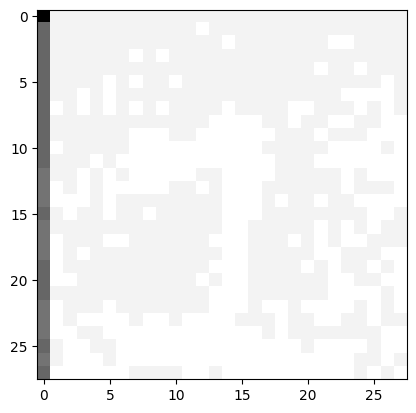

In [ ]:
plt.imshow(a.reshape(28, 28), cmap="gray")
print("Prediction: ", np.argmax(model.predict(a.reshape(1, 28, 28, 1))))

1/1 [==============================] - 0s 28ms/step
Prediction:  2


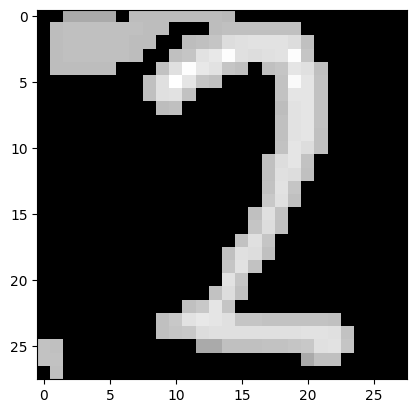

In [ ]:
plt.imshow(b.reshape(28, 28), cmap="gray")
print("Prediction: ", np.argmax(model.predict(b.reshape(1, 28, 28, 1))))

1/1 [==============================] - 0s 26ms/step
Prediction:  3


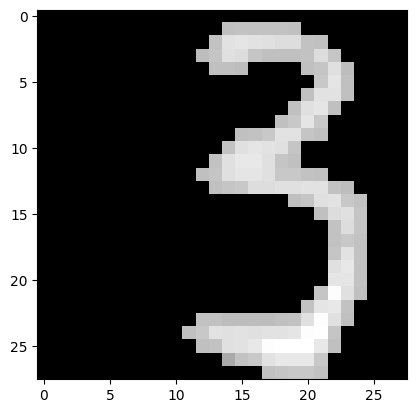

In [ ]:
plt.imshow(c.reshape(28, 28), cmap="gray")
print("Prediction: ", np.argmax(model.predict(c.reshape(1, 28, 28, 1))))

1/1 [==============================] - 0s 40ms/step
Prediction:  8


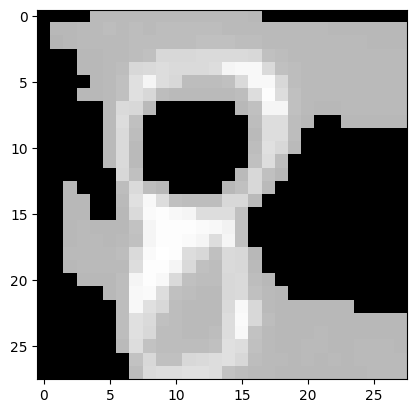

In [ ]:
plt.imshow(d.reshape(28, 28), cmap="gray")
print("Prediction: ", np.argmax(model.predict(d.reshape(1, 28, 28, 1))))